Spam Dectection -- Naive Bayes
The process of spam detection using Naive Bayes is:


strat - read the file - create dictionary - create word vector - start training - statr testing - end
Detect and filter spam from txt file named "SMSSpamCollection" that have already been compiled from my email.

In [2]:
from numpy import *
import numpy as np
with open('SMSSpamCollection',encoding='utf-8') as f:
    txt_list = f.readlines()

data = []
classVec = []

spam_data = []
for txt in txt_list:
    txt_list_2 = txt.strip("\n").split('\t')
    if txt_list_2[0] == "ham":
        data.append(txt_list_2[1])
        classVec.append(1)
    elif txt_list_2[0] == "spam":
        data.append(txt_list_2[1])
        classVec.append(0)
        spam_data.append(txt_list_2[1])
print(sum(classVec))
print(len(data))

4827
5574


Split each email by Regularization. Delect words whose length is smaller than 2. Then lower case each word.

In [3]:
def textParse(bigString):
    import re
    listOfTokens = re.split(r"\W*",bigString)
    return [tok.lower() for tok in listOfTokens if len(tok)>2]

Split words from 5574 emails including spam and ham. Then append them to lists named data_parse and spam_parse. 

In [4]:
data_parse = []
for t in data:
    data_parse.append(textParse(t))
print(len(data_parse))

spam_parse = []
for t in spam_data:
    spam_parse.append(textParse(t))
print(len(spam_parse))

5574
747


Define a function that tranverse each word in spam_parse. Delete stopwords. Generate a dictionary which has 2151 dimensions.

In [5]:
def createVocabList(dataSet):
    vocabSet = set([])
    vocabs = []
    for document in dataSet:
#         print(set(document))
        vocabSet = vocabSet | set(document)
#     print(list(vocabSet))
    for vocab in list(vocabSet):
  
        from nltk.corpus import stopwords as pw
        cacheStopWords=pw.words("english")
        if vocab not in cacheStopWords and not vocab.isdigit():
            vocabs.append(vocab)
    return list(vocabs)
vocabList = createVocabList(spam_parse)

Convert words to numeric vectors for computation.

In [6]:
def bagOfWords2VecMN(vocabList, inputSet):
    returnVec = [0] * len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec

Calculate the frequency of each word in both spam list and ham list. Compute the probability of being a ham given a email.

In [7]:
def trainNB(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pNormal = sum(trainCategory) / float(numTrainDocs)
    p0Num = ones(numWords)
    p1Num = ones(numWords)
    p0Denom = 2.0
    p1Denom = 2.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = log(p1Num / p1Denom)
    p0Vect = log(p0Num / p0Denom)

    return p0Vect,p1Vect,pNormal

In [8]:
def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1):
    p1 = sum(vec2Classify * p1Vec) + log(pClass1)
    p0 = sum(vec2Classify * p0Vec) + log(1-pClass1)
    if p1>p0:
        return 1
    else:
        return 0

Dataset of 5500 email. 3500 traning data. 2000 testing data.

In [9]:
%%time
import time
for _ in range(1000):
    time.sleep(0.01)
import sklearn
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
vocabList = createVocabList(spam_parse)
print(len(vocabList))
trainMat = []
trainClasses = []
print(len(data_parse))
trainSet_ini = np.array((range(5500)))
testSet = []

randIndex = 0
trainSet = []
testSet.append(trainSet_ini[:2000])
trainSet.append(trainSet_ini[2000:])

for docIndex in trainSet[0]:
    trainMat.append(bagOfWords2VecMN(vocabList,data_parse[docIndex]))
    trainClasses.append(classVec[docIndex])
p0V,p1V,pHam = trainNB(array(trainMat),array(trainClasses))

errorCount = 0
right_to_error = 0
error_to_right = 0

true_classVec = []
pred = []
for docIndex in testSet[0]:
    wordVector = bagOfWords2VecMN(vocabList, data_parse[docIndex])
    true_classVec.append(classVec[docIndex])
    pred.append(classifyNB(array(wordVector),p0V,p1V,pHam))

    if classVec[docIndex] == 1 and classifyNB(array(wordVector),p0V,p1V,pHam) != classVec[docIndex]:
        right_to_error += 1
 
    if classVec[docIndex] == 0 and classifyNB(array(wordVector),p0V,p1V,pHam) != classVec[docIndex]:
        error_to_right += 1
    if classifyNB(array(wordVector),p0V,p1V,pHam) != classVec[docIndex]:
        errorCount += 1
#         print("classification error",data_parse[docIndex])
accuracy_score_value = accuracy_score(true_classVec,pred)
recall_score_value = recall_score(true_classVec,pred)
precision_score_value = precision_score(true_classVec,pred)
classification_report_value = classification_report(true_classVec,pred)
print("error_to_right:",error_to_right)
print("right_to_error:",right_to_error)
print("............................................")
print("accuracy:",accuracy_score_value)
print("recall score：",recall_score_value)
print("precision:",precision_score_value)
print(classification_report_value)

0
5574
error_to_right: 280
right_to_error: 0
............................................
accuracy: 0.86
recall score： 1.0
precision: 0.86
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.86      1.00      0.92      1720

   micro avg       0.86      0.86      0.86      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.74      0.86      0.80      2000

CPU times: user 547 ms, sys: 218 ms, total: 765 ms
Wall time: 12.1 s


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Narrow testing data to 500. Plot the change of precision given training data from 500,1000,2000,3000,4000 to 5000.

No handles with labels found to put in legend.


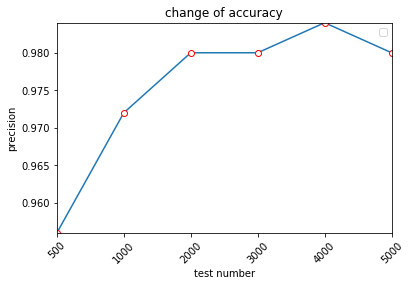

In [11]:
import matplotlib.pyplot as plt
from pylab import *                       

names = ['500', '1000', '2000', '3000', '4000','5000']
x = range(len(names))
x
range(0, 6)
y = [0.956, 0.972, 0.98, 0.98, 0.984,0.98]
plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.legend()  
plt.xticks(x, names, rotation=45)
plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("test number") 
plt.ylabel("precision") 
plt.title("change of accuracy") 
plt.savefig("NB.png")
plt.show()



Conclusion: in this project, I used Naive Bayes to detect spam in my mailbox. The accuracy is 0.86 when the email numbers are 5000. Also, when changing the test number, we can see an increase of accuracy from 500 to 5000.